<a href="https://colab.research.google.com/github/dilaraogz/GMKA_DILARA_OGUZ/blob/main/Python_%C3%96dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install yfinance

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup as bs

import warnings
warnings.filterwarnings("ignore")

In [ ]:

url = "https://www.isyatirim.com.tr/tr-tr/analiz/hisse/Sayfalar/Temel-Degerler-Ve-Oranlar.aspx?endeks=01#page-1"
     

response  = requests.get(url)

soup = bs(response.text, "html.parser")
table = soup.find("table", {"id": "summaryBasicData"})
tablo = pd.read_html(str(table))
tablo = pd.DataFrame(tablo[0])
tablo

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,AEFES,Anadolu Efes,Meşrubat / İçecek,7635,"45.207,2","2.306,5",329,5921
1,AGHOL,Anadolu Grubu Holding,Holdingler,10510,"25.595,5","1.305,9",358,2435
2,AKBNK,Akbank,Bankacılık,1929,"100.308,0","5.117,7",518,"5.200,0"
3,AKFGY,Akfen GYO,GYO,310,"4.030,0",2056,445,"1.300,0"
4,AKSA,Aksa,Endüstriyel Tekstil,6180,"20.007,8","1.020,8",353,3238
...,...,...,...,...,...,...,...,...
95,VESBE,Vestel Beyaz Esya,Dayanıklı Tüketim,1047,"16.752,0",8547,193,"1.600,0"
96,VESTL,Vestel Elektronik,Dayanıklı Tüketim,3998,"13.411,5",6843,399,3355
97,YKBNK,Yapı Kredi Bankası,Bankacılık,1163,"98.239,2","5.012,2",320,"8.447,1"
98,YYLGD,Yayla Agro Gıda,Gıda,2214,"10.463,4",5338,150,4726


In [ ]:
tablo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Kod                      100 non-null    object
 1   Hisse Adı                100 non-null    object
 2   Sektör                   100 non-null    object
 3   Kapanış (TL)             100 non-null    object
 4   Piyasa Değeri (mn TL)    100 non-null    object
 5   Piyasa Değeri (mn $)     100 non-null    object
 6   Halka Açıklık Oranı (%)  100 non-null    int64 
 7   Sermaye (mn TL)          100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [ ]:

tablo["Kapanış (TL)"] = tablo["Kapanış (TL)"].str.replace(".","")
tablo["Piyasa Değeri (mn TL)"] = tablo["Piyasa Değeri (mn TL)"].str.replace(".","")
tablo["Piyasa Değeri (mn $)"] = tablo["Piyasa Değeri (mn $)"].str.replace(".","")
tablo["Halka Açıklık Oranı (%)"] = tablo["Halka Açıklık Oranı (%)"]/10
tablo["Sermaye (mn TL)"] = tablo["Sermaye (mn TL)"].str.replace(".","")

tablo

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,AEFES,Anadolu Efes,Meşrubat / İçecek,7635,"45207,2","2306,5",32.9,5921
1,AGHOL,Anadolu Grubu Holding,Holdingler,10510,"25595,5","1305,9",35.8,2435
2,AKBNK,Akbank,Bankacılık,1929,"100308,0","5117,7",51.8,"5200,0"
3,AKFGY,Akfen GYO,GYO,310,"4030,0",2056,44.5,"1300,0"
4,AKSA,Aksa,Endüstriyel Tekstil,6180,"20007,8","1020,8",35.3,3238
...,...,...,...,...,...,...,...,...
95,VESBE,Vestel Beyaz Esya,Dayanıklı Tüketim,1047,"16752,0",8547,19.3,"1600,0"
96,VESTL,Vestel Elektronik,Dayanıklı Tüketim,3998,"13411,5",6843,39.9,3355
97,YKBNK,Yapı Kredi Bankası,Bankacılık,1163,"98239,2","5012,2",32.0,"8447,1"
98,YYLGD,Yayla Agro Gıda,Gıda,2214,"10463,4",5338,15.0,4726


In [ ]:
tablo["Kapanış (TL)"] = tablo["Kapanış (TL)"].str.replace(",",".")
tablo["Piyasa Değeri (mn TL)"] = tablo["Piyasa Değeri (mn TL)"].str.replace(",",".")
tablo["Piyasa Değeri (mn $)"] = tablo["Piyasa Değeri (mn $)"].str.replace(",",".")
tablo["Sermaye (mn TL)"] = tablo["Sermaye (mn TL)"].str.replace(",",".")

tablo


,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,AEFES,Anadolu Efes,Meşrubat / İçecek,7635,45207.2,2306.5,32.9,5921
1,AGHOL,Anadolu Grubu Holding,Holdingler,10510,25595.5,1305.9,35.8,2435
2,AKBNK,Akbank,Bankacılık,1929,100308.0,5117.7,51.8,5200.0
3,AKFGY,Akfen GYO,GYO,310,4030.0,2056,44.5,1300.0
4,AKSA,Aksa,Endüstriyel Tekstil,6180,20007.8,1020.8,35.3,3238
...,...,...,...,...,...,...,...,...
95,VESBE,Vestel Beyaz Esya,Dayanıklı Tüketim,1047,16752.0,8547,19.3,1600.0
96,VESTL,Vestel Elektronik,Dayanıklı Tüketim,3998,13411.5,6843,39.9,3355
97,YKBNK,Yapı Kredi Bankası,Bankacılık,1163,98239.2,5012.2,32.0,8447.1
98,YYLGD,Yayla Agro Gıda,Gıda,2214,10463.4,5338,15.0,4726


In [ ]:
tablo["Kapanış (TL)"] = tablo["Kapanış (TL)"].astype(float)
tablo["Kapanış (TL)"] = tablo["Kapanış (TL)"]/100

tablo["Piyasa Değeri (mn TL)"] = tablo["Piyasa Değeri (mn TL)"].astype(float)
tablo["Piyasa Değeri (mn $)"] = tablo["Piyasa Değeri (mn $)"].astype(float)
tablo["Sermaye (mn TL)"] = tablo["Sermaye (mn TL)"].astype(float)

tablo

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,AEFES,Anadolu Efes,Meşrubat / İçecek,76.35,45207.2,2306.5,32.9,5921.0
1,AGHOL,Anadolu Grubu Holding,Holdingler,105.10,25595.5,1305.9,35.8,2435.0
2,AKBNK,Akbank,Bankacılık,19.29,100308.0,5117.7,51.8,5200.0
3,AKFGY,Akfen GYO,GYO,3.10,4030.0,2056.0,44.5,1300.0
4,AKSA,Aksa,Endüstriyel Tekstil,61.80,20007.8,1020.8,35.3,3238.0
...,...,...,...,...,...,...,...,...
95,VESBE,Vestel Beyaz Esya,Dayanıklı Tüketim,10.47,16752.0,8547.0,19.3,1600.0
96,VESTL,Vestel Elektronik,Dayanıklı Tüketim,39.98,13411.5,6843.0,39.9,3355.0
97,YKBNK,Yapı Kredi Bankası,Bankacılık,11.63,98239.2,5012.2,32.0,8447.1
98,YYLGD,Yayla Agro Gıda,Gıda,22.14,10463.4,5338.0,15.0,4726.0


In [ ]:
tablo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kod                      100 non-null    object 
 1   Hisse Adı                100 non-null    object 
 2   Sektör                   100 non-null    object 
 3   Kapanış (TL)             100 non-null    float64
 4   Piyasa Değeri (mn TL)    100 non-null    float64
 5   Piyasa Değeri (mn $)     100 non-null    float64
 6   Halka Açıklık Oranı (%)  100 non-null    float64
 7   Sermaye (mn TL)          100 non-null    float64
dtypes: float64(5), object(3)
memory usage: 6.4+ KB


In [ ]:
temiz_tablo = tablo.copy()
temiz_tablo

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,AEFES,Anadolu Efes,Meşrubat / İçecek,76.35,45207.2,2306.5,32.9,5921.0
1,AGHOL,Anadolu Grubu Holding,Holdingler,105.10,25595.5,1305.9,35.8,2435.0
2,AKBNK,Akbank,Bankacılık,19.29,100308.0,5117.7,51.8,5200.0
3,AKFGY,Akfen GYO,GYO,3.10,4030.0,2056.0,44.5,1300.0
4,AKSA,Aksa,Endüstriyel Tekstil,61.80,20007.8,1020.8,35.3,3238.0
...,...,...,...,...,...,...,...,...
95,VESBE,Vestel Beyaz Esya,Dayanıklı Tüketim,10.47,16752.0,8547.0,19.3,1600.0
96,VESTL,Vestel Elektronik,Dayanıklı Tüketim,39.98,13411.5,6843.0,39.9,3355.0
97,YKBNK,Yapı Kredi Bankası,Bankacılık,11.63,98239.2,5012.2,32.0,8447.1
98,YYLGD,Yayla Agro Gıda,Gıda,22.14,10463.4,5338.0,15.0,4726.0


In [ ]:
temiz_tablo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kod                      100 non-null    object 
 1   Hisse Adı                100 non-null    object 
 2   Sektör                   100 non-null    object 
 3   Kapanış (TL)             100 non-null    float64
 4   Piyasa Değeri (mn TL)    100 non-null    float64
 5   Piyasa Değeri (mn $)     100 non-null    float64
 6   Halka Açıklık Oranı (%)  100 non-null    float64
 7   Sermaye (mn TL)          100 non-null    float64
dtypes: float64(5), object(3)
memory usage: 6.4+ KB


# Bist 100 Yapısının İncelenmesi

In [ ]:
top10 = temiz_tablo.sort_values('Piyasa Değeri (mn TL)', ascending=False).head(10)
top10

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
52,KCHOL,Koç Holding,Holdingler,96.85,245601.7,12530.6,26.4,2535.9
72,SASA,Sasa Polyester Sanayi A.Ş.,Endüstriyel Tekstil,95.60,220127.7,11230.9,23.0,2302.6
35,FROTO,Ford Otosan,Otomotiv,561.30,196965.8,10049.2,17.8,3509.0
81,THYAO,Türk Hava Yolları,Havayolları ve Hizm.,132.60,182988.0,9336.0,50.3,1380.0
30,ENKAI,Enka İnşaat,İnşaat- Taahhüt,24.30,145800.0,7438.7,8.9,6000.0
46,ISCTR,İş Bankası (C),Bankacılık,13.97,139699.6,7127.5,33.5,10000.0
36,GARAN,Garanti Bankası,Bankacılık,33.10,139020.0,7092.8,14.0,4200.0
90,TUPRS,Tüpraş,Petrol,71.00,136802.5,6979.6,46.5,1926.8
74,SISE,Şişecam,Cam,39.86,122099.7,6229.5,48.9,3063.2
32,EREGL,Ereğli Demir Çelik,Demir-Çelik Temel,30.80,107800.0,5499.9,47.5,3500.0


In [ ]:
fig_1 = px.bar(top10, x=top10['Hisse Adı'], y=top10['Piyasa Değeri (mn TL)'],
        width=1000, height=500,
        title = "Piyasa Değeri En Yüksek İlk 10 Şirket",
        hover_data = {"Hisse Adı": "::", "Piyasa Değeri (mn TL)": ":.2f",},
        )

fig_1.show()

In [ ]:
sektörler = dict(temiz_tablo.groupby("Sektör").groups)
Sektörler = []
Piyasa_Degeri = []
for i in sektörler.keys():
  Sektörler.append(i)
  Piyasa_Degeri.append(temiz_tablo[temiz_tablo["Sektör"] == i]["Kapanış (TL)"].mean())


In [ ]:
tablo2 = pd.DataFrame()
tablo2["Sektör İsimleri"] = Sektörler
tablo2["Piyasa Değerleri"] = Piyasa_Degeri
tablo2.head(4)

,Sektör İsimleri,Piyasa Değerleri
0,Bankacılık,12.026667
1,Cam,39.860000
2,Dayanıklı Tüketim,48.316667
3,Demir-Çelik Döküm,55.630000


In [ ]:
tablo2 = pd.DataFrame()
tablo2["Sektör İsimleri"] = Sektörler
tablo2["Piyasa Değerleri"] = Piyasa_Degeri    
tablo2.head()

,Sektör İsimleri,Piyasa Değerleri
0,Bankacılık,12.026667
1,Cam,39.860000
2,Dayanıklı Tüketim,48.316667
3,Demir-Çelik Döküm,55.630000
4,Demir-Çelik Temel,21.243333


In [ ]:

tablo2_sorted = tablo2.sort_values('Piyasa Değerleri', ascending=False)

fig = px.bar(tablo2_sorted, x="Sektör İsimleri", y="Piyasa Değerleri",text_auto='.2s',
              hover_data=['Sektör İsimleri', 'Piyasa Değerleri'], color='Piyasa Değerleri',width=1000, height=500,
        title="Sektör Bazlı Şirketlerin Piyasa Değerleri ortalaması",)

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()

# Şireketlerin Analizi:

In [ ]:

# Verileri indirin ve her şirket için ayrı bir değişkene kaydedin
SKBNKC_data = yf.download('SKBNK.IS', start='2021-01-01', end='2021-12-31')
TSKB_data = yf.download('TSKB.IS', start='2021-01-01', end='2021-12-31')
TCELL_data = yf.download('TCELL.IS', start='2021-01-01', end='2021-12-31')
TTKOM_data = yf.download('TTKOM.IS', start='2021-01-01', end='2021-12-31')
TURSG_data = yf.download('TURSG.IS', start='2021-01-01', end='2021-12-31')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
SKBNKC_data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1.52,1.60,1.52,1.55,1.514809,489603227
2021-01-05,1.54,1.56,1.51,1.52,1.485490,184249504
2021-01-06,1.53,1.59,1.52,1.57,1.534355,568239116


In [ ]:
TSKB_data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1.79,1.85,1.78,1.81,1.775921,228513158
2021-01-05,1.79,1.82,1.77,1.77,1.736674,235326362
2021-01-06,1.79,1.83,1.78,1.79,1.756298,216136515


In [ ]:
TCELL_data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,16.180000,16.480000,16.129999,16.430000,14.732425,39063984
2021-01-05,16.360001,16.709999,16.299999,16.530001,14.822092,49179591
2021-01-06,16.620001,17.070000,16.610001,16.860001,15.117996,73583609


In [ ]:
TTKOM_data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,8.61,8.95,8.58,8.90,7.296325,31664415
2021-01-05,8.83,8.96,8.59,8.76,7.181551,21410310
2021-01-06,8.79,8.87,8.70,8.74,7.165155,17600918


In [ ]:
TURSG_data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,6.65,7.17,6.62,7.11,6.139704,100635696
2021-01-05,7.01,7.34,6.98,7.13,6.156974,83206197
2021-01-06,7.18,7.20,7.04,7.05,6.087892,35165796


In [ ]:
# Semboller listesi
symbols = ['SKBNK.IS', 'TCELL.IS', 'TSKB.IS', 'TTKOM.IS', 'TURSG.IS', "XU100.IS"]

# Verileri al
data = yf.download(symbols, start='2021-01-01', end='2021-12-31', interval='1d', group_by='ticker')


[*********************100%***********************]  6 of 6 completed


In [ ]:
# Her hisse senedi için ayrı bir veri çerçevesi oluştur
skbnk = data['SKBNK.IS']
tcell = data['TCELL.IS']
tskb = data['TSKB.IS']
ttkom = data['TTKOM.IS']
tursg = data['TURSG.IS']
bist100 = data['XU100.IS']

skbnk = skbnk[['Adj Close']]
tcell = tcell[['Adj Close']]
tskb = tskb[['Adj Close']]
ttkom = ttkom[['Adj Close']]
tursg = tursg[['Adj Close']]
bist100 = bist100[['Adj Close']]

skbnk["Normalize"] = skbnk[['Adj Close']] / skbnk.iloc[0,0]
tcell["Normalize"] = tcell[['Adj Close']]/ tcell.iloc[0,0]
tskb["Normalize"] = tskb[['Adj Close']]/tskb.iloc[0,0]
ttkom["Normalize"] = ttkom[['Adj Close']]/ttkom.iloc[0,0]
tursg["Normalize"] = tursg[['Adj Close']]/tursg.iloc[0,0]
bist100["Normalize"] = bist100[['Adj Close']]/bist100.iloc[0,0]

In [ ]:
tablo3 = pd.DataFrame()
tablo3["Bist100 Normalize"] = bist100["Normalize"]
tablo3["Şeker Bank Normalize"] = tcell["Normalize"]
tablo3["Turcell Normalize"] = bist100["Normalize"]
tablo3["Türk Telekom Normalize"] = ttkom["Normalize"]
tablo3["Türkiye Sigorta Normalize"] = tursg["Normalize"]
tablo3["Türkiye Sınai Kalkınma Bankası Normalize"] = tskb["Normalize"]
tablo3.head(3)

,Bist100 Normalize,Şeker Bank Normalize,Turcell Normalize,Türk Telekom Normalize,Türkiye Sigorta Normalize,Türkiye Sınai Kalkınma Bankası Normalize
Date,,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,0.996121,1.006086,0.996121,0.984270,1.002813,0.977901
2021-01-06,1.006687,1.026172,1.006687,0.982022,0.991561,0.988950


In [ ]:
fig_1 = px.line(tablo3, y=["Bist100 Normalize","Şeker Bank Normalize","Turcell Normalize","Türk Telekom Normalize", "Türkiye Sigorta Normalize","Türkiye Sınai Kalkınma Bankası Normalize"],
        width=1000, height=500,
        title = "Hisse Senetleri Performansı",
        labels = {"Bist100": bist100['Normalize']}
        )

fig_1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig_1.show()

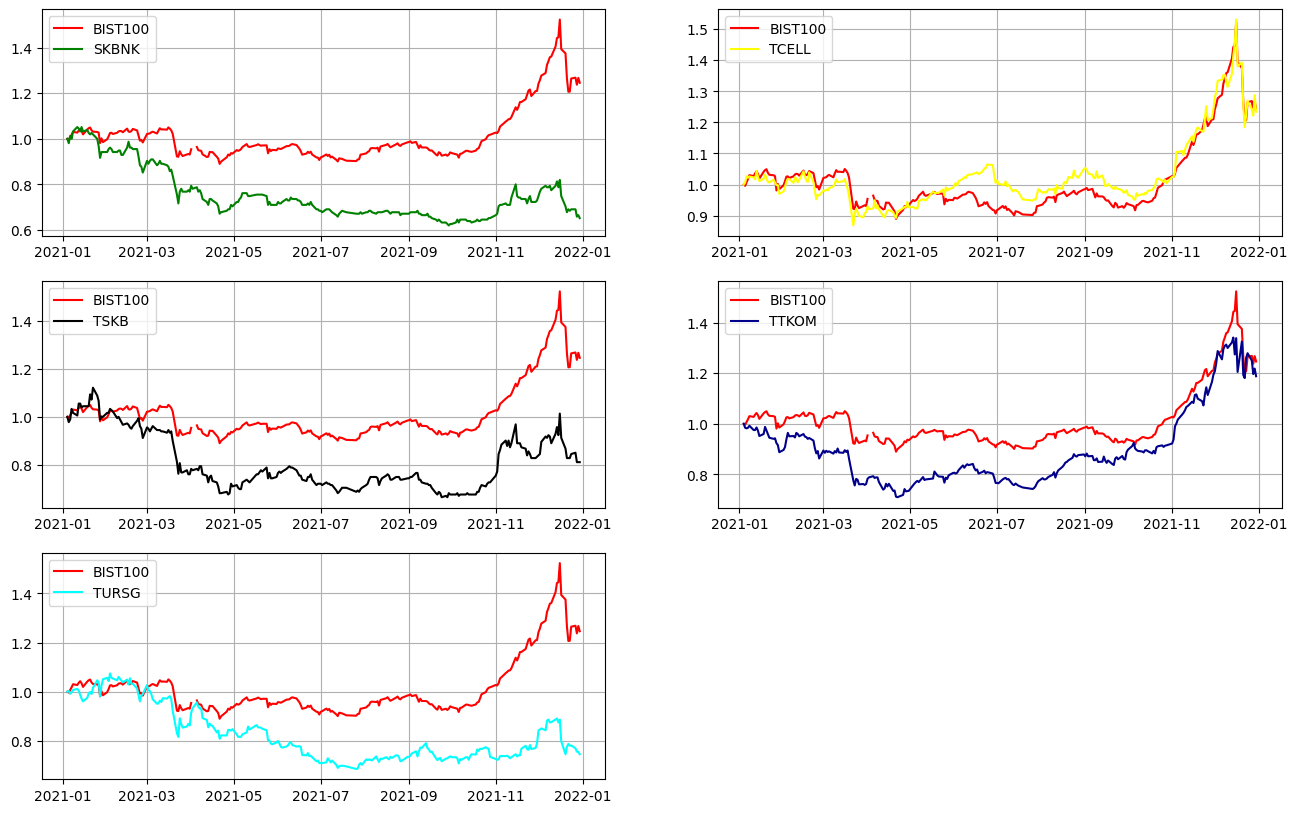

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

plt.subplot(3, 2, 1)
plt.plot(bist100['Normalize'], label='BIST100', color="red")
plt.plot(skbnk['Normalize'], label='SKBNK', color="green")
plt.legend()
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(bist100['Normalize'], label='BIST100', color="red")
plt.plot(tcell['Normalize'], label='TCELL', color="yellow")
plt.legend()
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(bist100['Normalize'], label='BIST100', color="red")
plt.plot(tskb['Normalize'], label='TSKB', color="black")
plt.legend()
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(bist100['Normalize'], label='BIST100', color="red")
plt.plot(ttkom['Normalize'], label='TTKOM', color="darkblue")
plt.legend()
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(bist100['Normalize'], label='BIST100', color="red")
plt.plot(tursg['Normalize'], label='TURSG', color="aqua")
plt.legend()
plt.grid()

plt.show()


In [ ]:
bist100 = temiz_tablo.copy()
symbols = ['SKBNK', 'TCELL', 'TSKB', 'TTKOM', 'TURSG']
deger = []
hisse_adı = []
for i in symbols:
    deger.append(temiz_tablo[temiz_tablo["Kod"] == i]["Piyasa Değeri (mn TL)"].values[0])
    hisse_adı.append(temiz_tablo[temiz_tablo["Kod"] == i]["Hisse Adı"].values[0])

bist5 = pd.DataFrame()
bist5["Kod"] = symbols
bist5["Hisse Adı"] = hisse_adı
bist5["Piyasa Değeri (mn TL)"] = deger
bist5

,Kod,Hisse Adı,Piyasa Değeri (mn TL)
0,SKBNK,Şekerbank,4371.0
1,TCELL,Turkcell,75900.0
2,TSKB,TSKB,12348.0
3,TTKOM,Türk Telekom,48370.0
4,TURSG,Türkiye Sigorta,11708.2


In [ ]:
bist5["Piyasa Değeri (mn TL)"].mean()

30539.440000000002

In [ ]:
bist100["Piyasa Değeri (mn TL)"].mean()

39559.390999999996

<BarContainer object of 2 artists>

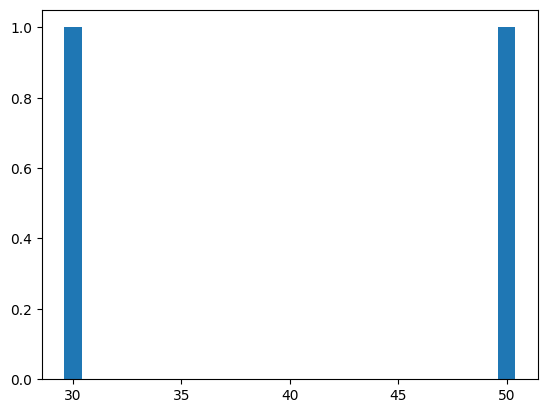

In [ ]:
plt.bar(x=[30,50], height=1)

In [ ]:
plt.figure(figsize=(16, 10))

plt.line(x=[bist5["Piyasa Değeri (mn TL)"].mean(), bist100["Piyasa Değeri (mn TL)"].mean()], y=50)
plt.show()

AttributeError: ignored

<Figure size 1600x1000 with 0 Axes>